# 1. Load Package and Data

In [1]:
import pandas as pd
import numpy as np
from fbprophet import Prophetophet

In [13]:
df = pd.read_csv('./prophet/examples/example_wp_R.csv')

In [14]:
df['y'] = np.log(df['y'])

# 2. Carrying Capacity

In [4]:
df['cap'] = 8.5

# 3. Fit

In [5]:
m = Prophet(growth='logistic')
m.fit(df)

INFO:fbprophet.forecaster:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.
/Users/sailyourlife/anaconda/lib/python3.6/site-packages/pystan/misc.py:399: FutureWarning: Conversion of the second argument of issubdtype from `float` to `np.floating` is deprecated. In future, it will be treated as `np.float64 == np.dtype(float).type`.
  elif np.issubdtype(np.asarray(v).dtype, float):


In [7]:
df.tail()

,ds,y,cap
2858,2015-12-11,7.834788,8.5
2859,2015-12-12,7.360104,8.5
2860,2015-12-13,7.479864,8.5
2861,2015-12-18,7.765145,8.5
2862,2015-12-19,7.220374,8.5


# 4. Predict

In [8]:
future = m.make_future_dataframe(periods=1826)
future['cap'] = 8.5
fcst = m.predict(future)

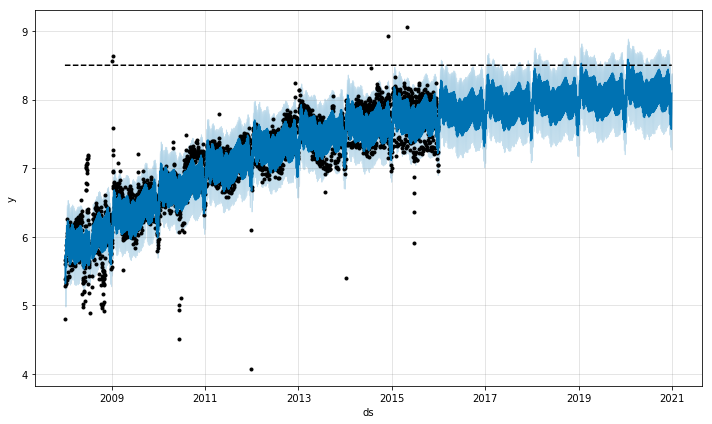

In [9]:
m.plot(fcst)

# 5. Saturating Minimum

In [15]:
df.head()

,ds,y
0,2008-01-30,5.976351
1,2008-01-16,6.049733
2,2008-01-17,6.011267
3,2008-01-14,5.953243
4,2008-01-15,5.910797


INFO:fbprophet.forecaster:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.
/Users/sailyourlife/anaconda/lib/python3.6/site-packages/pystan/misc.py:399: FutureWarning: Conversion of the second argument of issubdtype from `float` to `np.floating` is deprecated. In future, it will be treated as `np.float64 == np.dtype(float).type`.
  elif np.issubdtype(np.asarray(v).dtype, float):


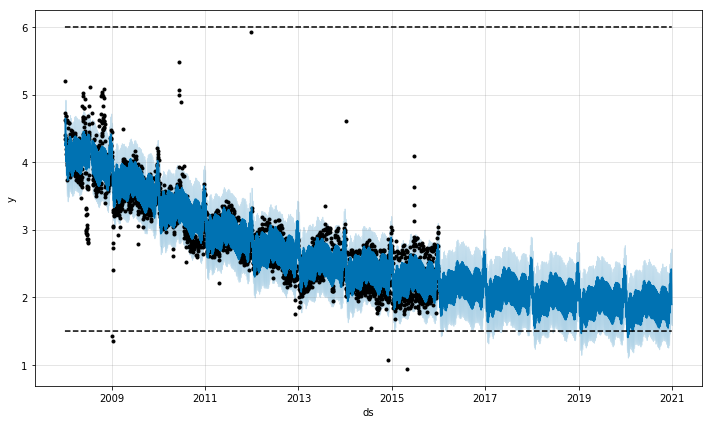

In [16]:
df['y'] = 10 - df['y']
df['cap'] = 6
df['floor'] = 1.5
future['cap'] = 6
future['floor'] = 1.5

m = Prophet(growth='logistic')
m.fit(df)
fcst = m.predict(future)
m.plot(fcst)